In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from util import fetch_data_if_not_exist

files = [f"steinmetz_part{i}.npz" for i in range(3)]
urls = [
    "https://osf.io/agvxh/download",
    "https://osf.io/uv3mw/download",
    "https://osf.io/ehmw2/download",
]

for file_name, url in zip(files, urls):
    fetch_data_if_not_exist(file_name, url)

In [4]:
alldata = np.array([])
for file in files:
    data = np.load(file, allow_pickle=True)["dat"] # np.load(file).files = ["dat"]
    alldata = np.hstack((alldata, data))
n_alldata = len(alldata)

In [27]:
data = alldata[11]
spikes = np.array(data["spks"])
[n_neurons, n_trials, n_time_bins] = spikes.shape
rts = np.array(data["reaction_time"])
contrasts = [(l,r) for r, l in zip(data["contrast_left"], data["contrast_right"])]
contrast_pairs = np.unique(contrasts, axis=0)

In [28]:
d = dict()
for i in range(n_trials):
    d[contrasts[i]] = np.append(d.setdefault(contrasts[i], np.array([])), rts[i][0])

/Users/temma/ghq/steinmetz/venv/lib/python3.10/site-packages/matplotlib/mlab.py:970: RuntimeWarning: invalid value encountered in subtract
  diff = self.dataset[:, i, np.newaxis] - points


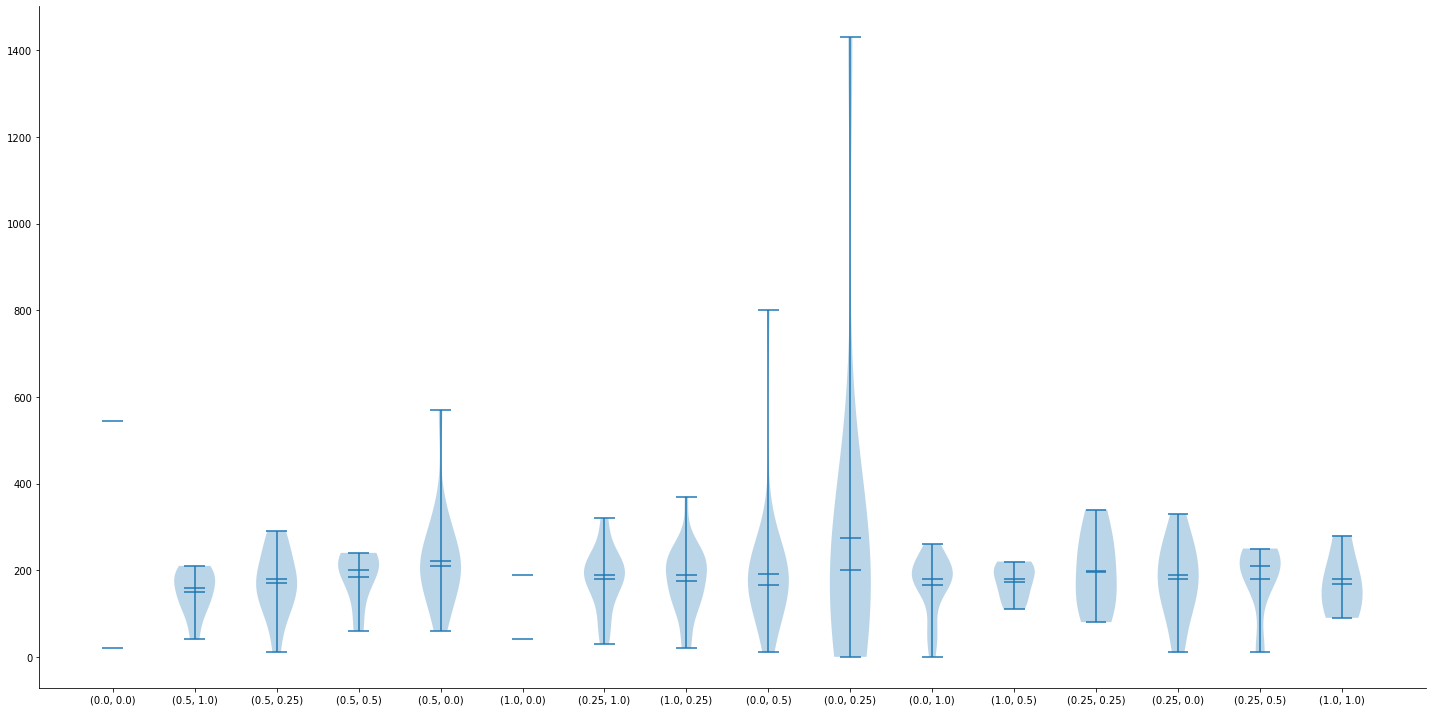

In [30]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

labels = list(d.keys())
values = list(d.values())
ax.violinplot(values, showmeans=True, showmedians=True)
ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels);

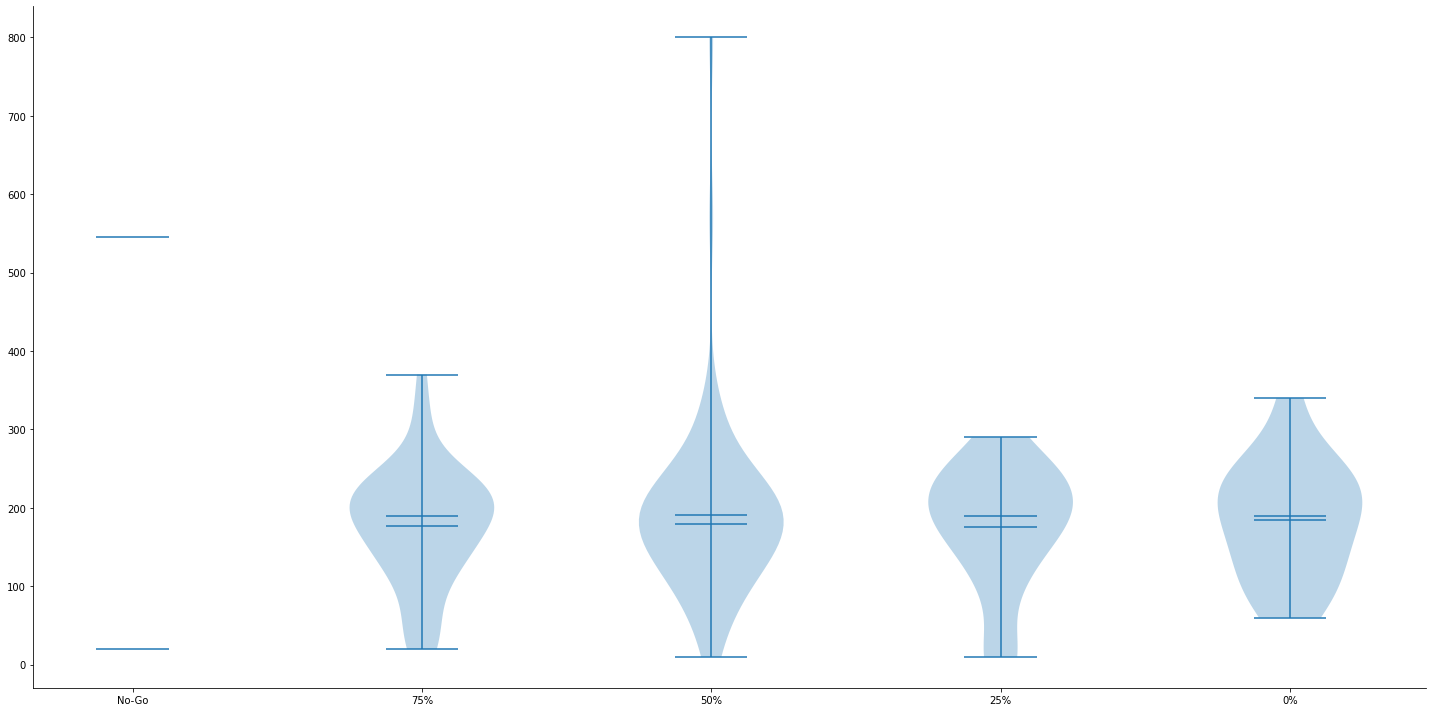

In [31]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

labels = ["No-Go", "75%", "50%", "25%", "0%"]
values = [
  d[(0.0, 0.0)],
  np.concatenate([d[(0.25, 1.0)], d[(1.0, 0.25)]]),
  np.concatenate([d[(0.0, 0.5)], d[(0.5, 0.0)], d[(0.5, 1.0)], d[(1.0, 0.5)]]),
  np.concatenate([d[(0.25, 0.5)], d[(0.5, 0.25)]]),
  np.concatenate([d[(0.25, 0.25)], d[(0.5, 0.5)], d[(1.0, 1.0)]])
]
ax.violinplot(values, showmeans=True, showmedians=True)
ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels);

/Users/temma/ghq/steinmetz/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


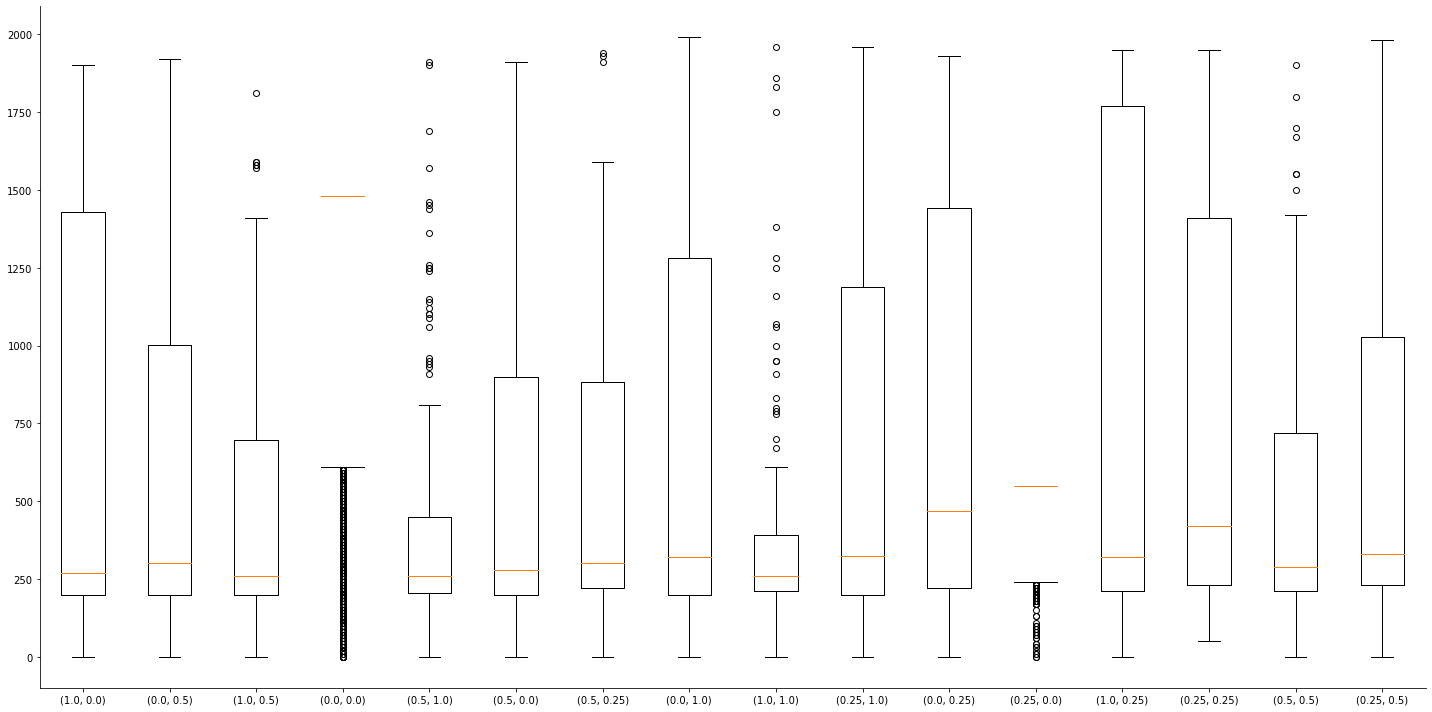

In [49]:
from constants import contrast_pairs
from util import split_data_into_each_contrast_pairs

d = split_data_into_each_contrast_pairs(alldata, "reaction_time", lambda arr: arr[:, 0])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

labels = list(d.keys())
values = list(d.values())
ax.boxplot(values)
ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels);


/Users/temma/ghq/steinmetz/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


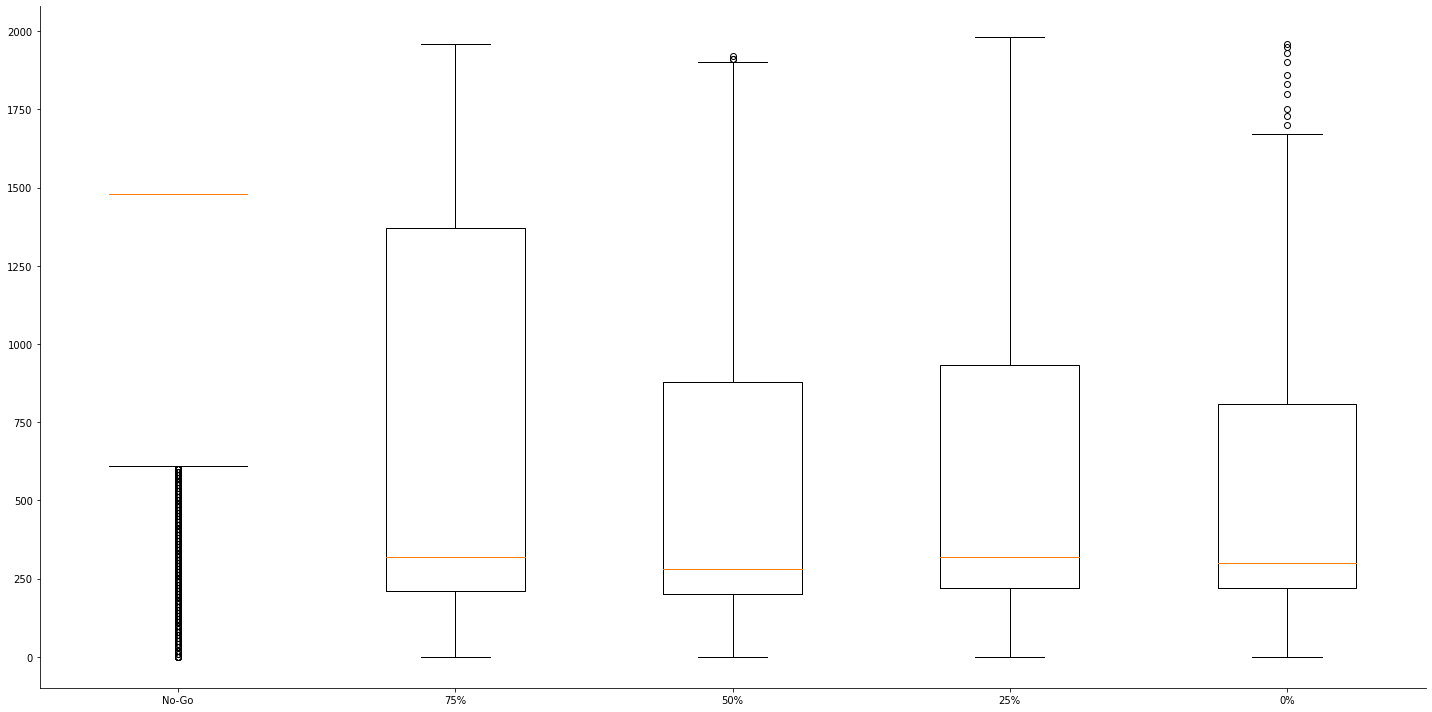

In [51]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

labels = ["No-Go", "75%", "50%", "25%", "0%"]
values = [
  d[(0.0, 0.0)],
  np.concatenate([d[(0.25, 1.0)], d[(1.0, 0.25)]]),
  np.concatenate([d[(0.0, 0.5)], d[(0.5, 0.0)], d[(0.5, 1.0)], d[(1.0, 0.5)]]),
  np.concatenate([d[(0.25, 0.5)], d[(0.5, 0.25)]]),
  np.concatenate([d[(0.25, 0.25)], d[(0.5, 0.5)], d[(1.0, 1.0)]])
]
ax.boxplot(values)
ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels);

In [59]:
tmp = np.array(list(d.values()))[0]
tmp[tmp < 0.1]

/var/folders/w7/rrcz7y056_q_zqnsld3kmr580000gn/T/ipykernel_2961/1633986134.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tmp = np.array(list(d.values()))[0]


array([0., 0., 0., 0., 0.])